In [1]:
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(scales)

array(['scales', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [2]:
threshold = [0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9]

In [3]:
misclass_error = [0.5267395054629097,
 0.5261644623346751,
 0.5261644623346751,
 0.523289246693502,
 0.5169637722829212,
 0.515813686026452,
 0.515813686026452,
 0.5152386428982174,
 0.5106382978723404,
 0.5117883841288097,
 0.5123634272570443,
 0.5106382978723404,
 0.5100632547441059,
 0.5100632547441059,
 0.3231742380678551,
 0.32259919493962047,
 0.32202415181138583,
 0.32144910868315124,
 0.32144910868315124,
 0.2944220816561242,
 0.2944220816561242,
 0.28464634847613574,
 0.25704427832087406,
 0.25589419206440484,
 0.2547441058079356,
 0.2547441058079356,
 0.25416906267970096,
 0.2535940195514664,
 0.24439332949971249,
 0.24381828637147787,
 0.24726854514088556,
 0.24899367452558943,
 0.24784358826912017,
 0.2484186313973548,
 0.2484186313973548,
 0.24956871765382405,
 0.2507188039102933,
 0.2553191489361702,
 0.25589419206440484,
 0.2564692351926394,
 0.2553191489361702,
 0.2564692351926394,
 0.2564692351926394,
 0.25589419206440484,
 0.25991949396204717,
 0.261644623346751,
 0.26336975273145485,
 0.2610695802185164,
 0.261644623346751,
 0.261644623346751,
 0.26279470960322027,
 0.2650948821161587,
 0.26682001150086254,
 0.2685451408855664,
 0.27084531339850487,
 0.2714203565267395,
 0.27889591719378953,
 0.28292121909143186,
 0.28637147786083955,
 0.2898217366302473,
 0.29269695227142034,
 0.29384703852788957,
 0.3024726854514089,
 0.3041978148361127,
 0.3064979873490512,
 0.3105232892466935,
 0.31512363427257045,
 0.3283496262219667,
 0.3341000575043128,
 0.3364002300172513,
 0.33812535940195515,
 0.339850488786659,
 0.3433007475560667,
 0.3467510063254744,
 0.34732604945370904,
 0.3599769982748706,
 0.36400230017251295,
 0.3651523864289822,
 0.3663024726854514,
 0.3847038527889592,
 0.3887291546866015]

In [4]:
import pandas as pd
error = pd.DataFrame({'threshold': threshold, 'error_rate':misclass_error})
min_error = error.nsmallest(1, 'error_rate')

In [5]:
min_error

,threshold,error_rate
29,0.39,0.243818


In [6]:
%R -i error

In [7]:
%R -i min_error

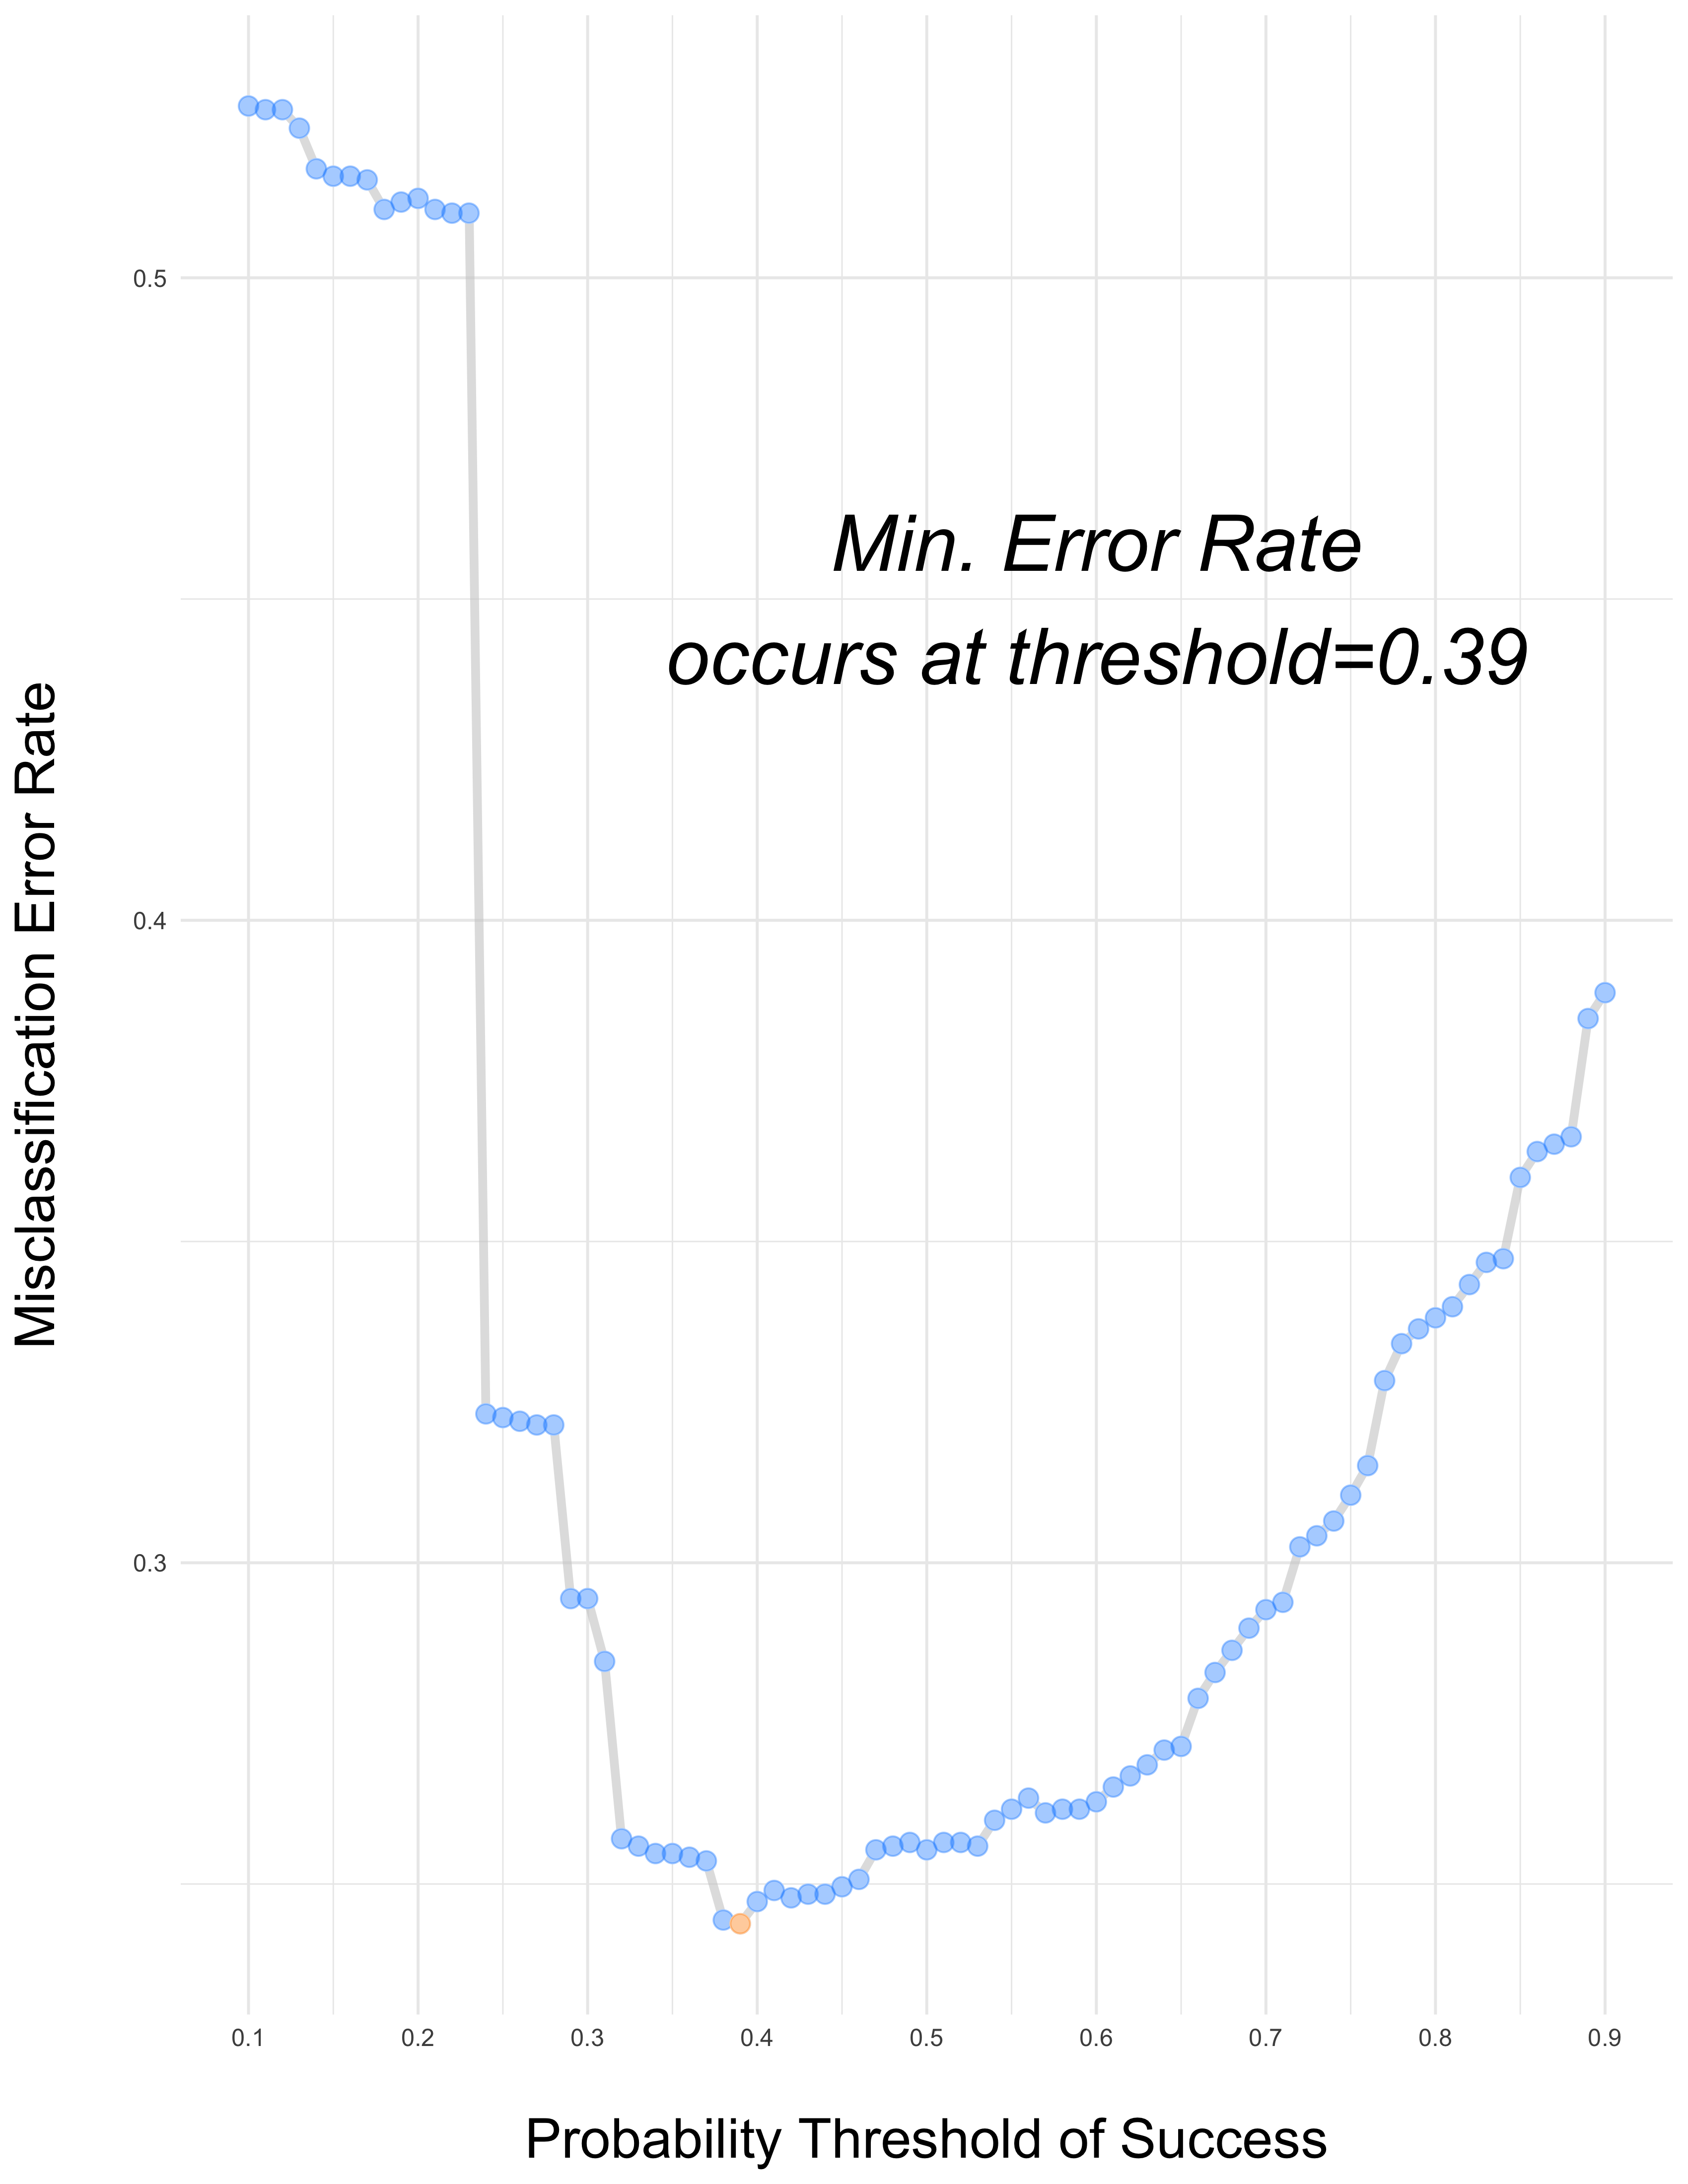

In [8]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_line(aes(x=threshold, y=error_rate), data=error, color='grey80', size=1.5, alpha=0.6) +
geom_point(aes(x=threshold, y=error_rate), data=error, color='white', alpha=1, size=3 ) +
geom_point(aes(x=threshold, y=error_rate), data=error, color='dodgerblue', alpha=0.4, size=3 ) +
geom_point(aes(x=threshold, y=error_rate), data=min_error, color='white', alpha=1, size=3) +
geom_point(aes(x=threshold, y=error_rate), data=min_error, color='darkorange', alpha=0.4, size=3) +
ylab('Misclassification Error Rate\n') + xlab('\nProbability Threshold of Success') +
annotate('text', x=0.6, y=0.45, label='Min. Error Rate\noccurs at threshold=0.39', fontface='italic', size=10) +
scale_x_continuous(limits=c(0.1, 0.9), breaks=seq(0.1, 0.9, by=0.1)) +
theme_minimal() + theme(axis.title=element_text(size=20))

#ggsave('ROC.png')